# IE 7300 Project

In [458]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [459]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from scipy import optimize
#import svm_utils
#from svm_utils  import *

In [460]:
onp = pd.read_csv('OnlineNewsPopularity.csv')
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [461]:
onp.shape

(39644, 61)

In [462]:
onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [463]:
onp.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [464]:
onp.columns=onp.columns.str.replace(" ","")

<ipython-input-465-35357d272d2d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


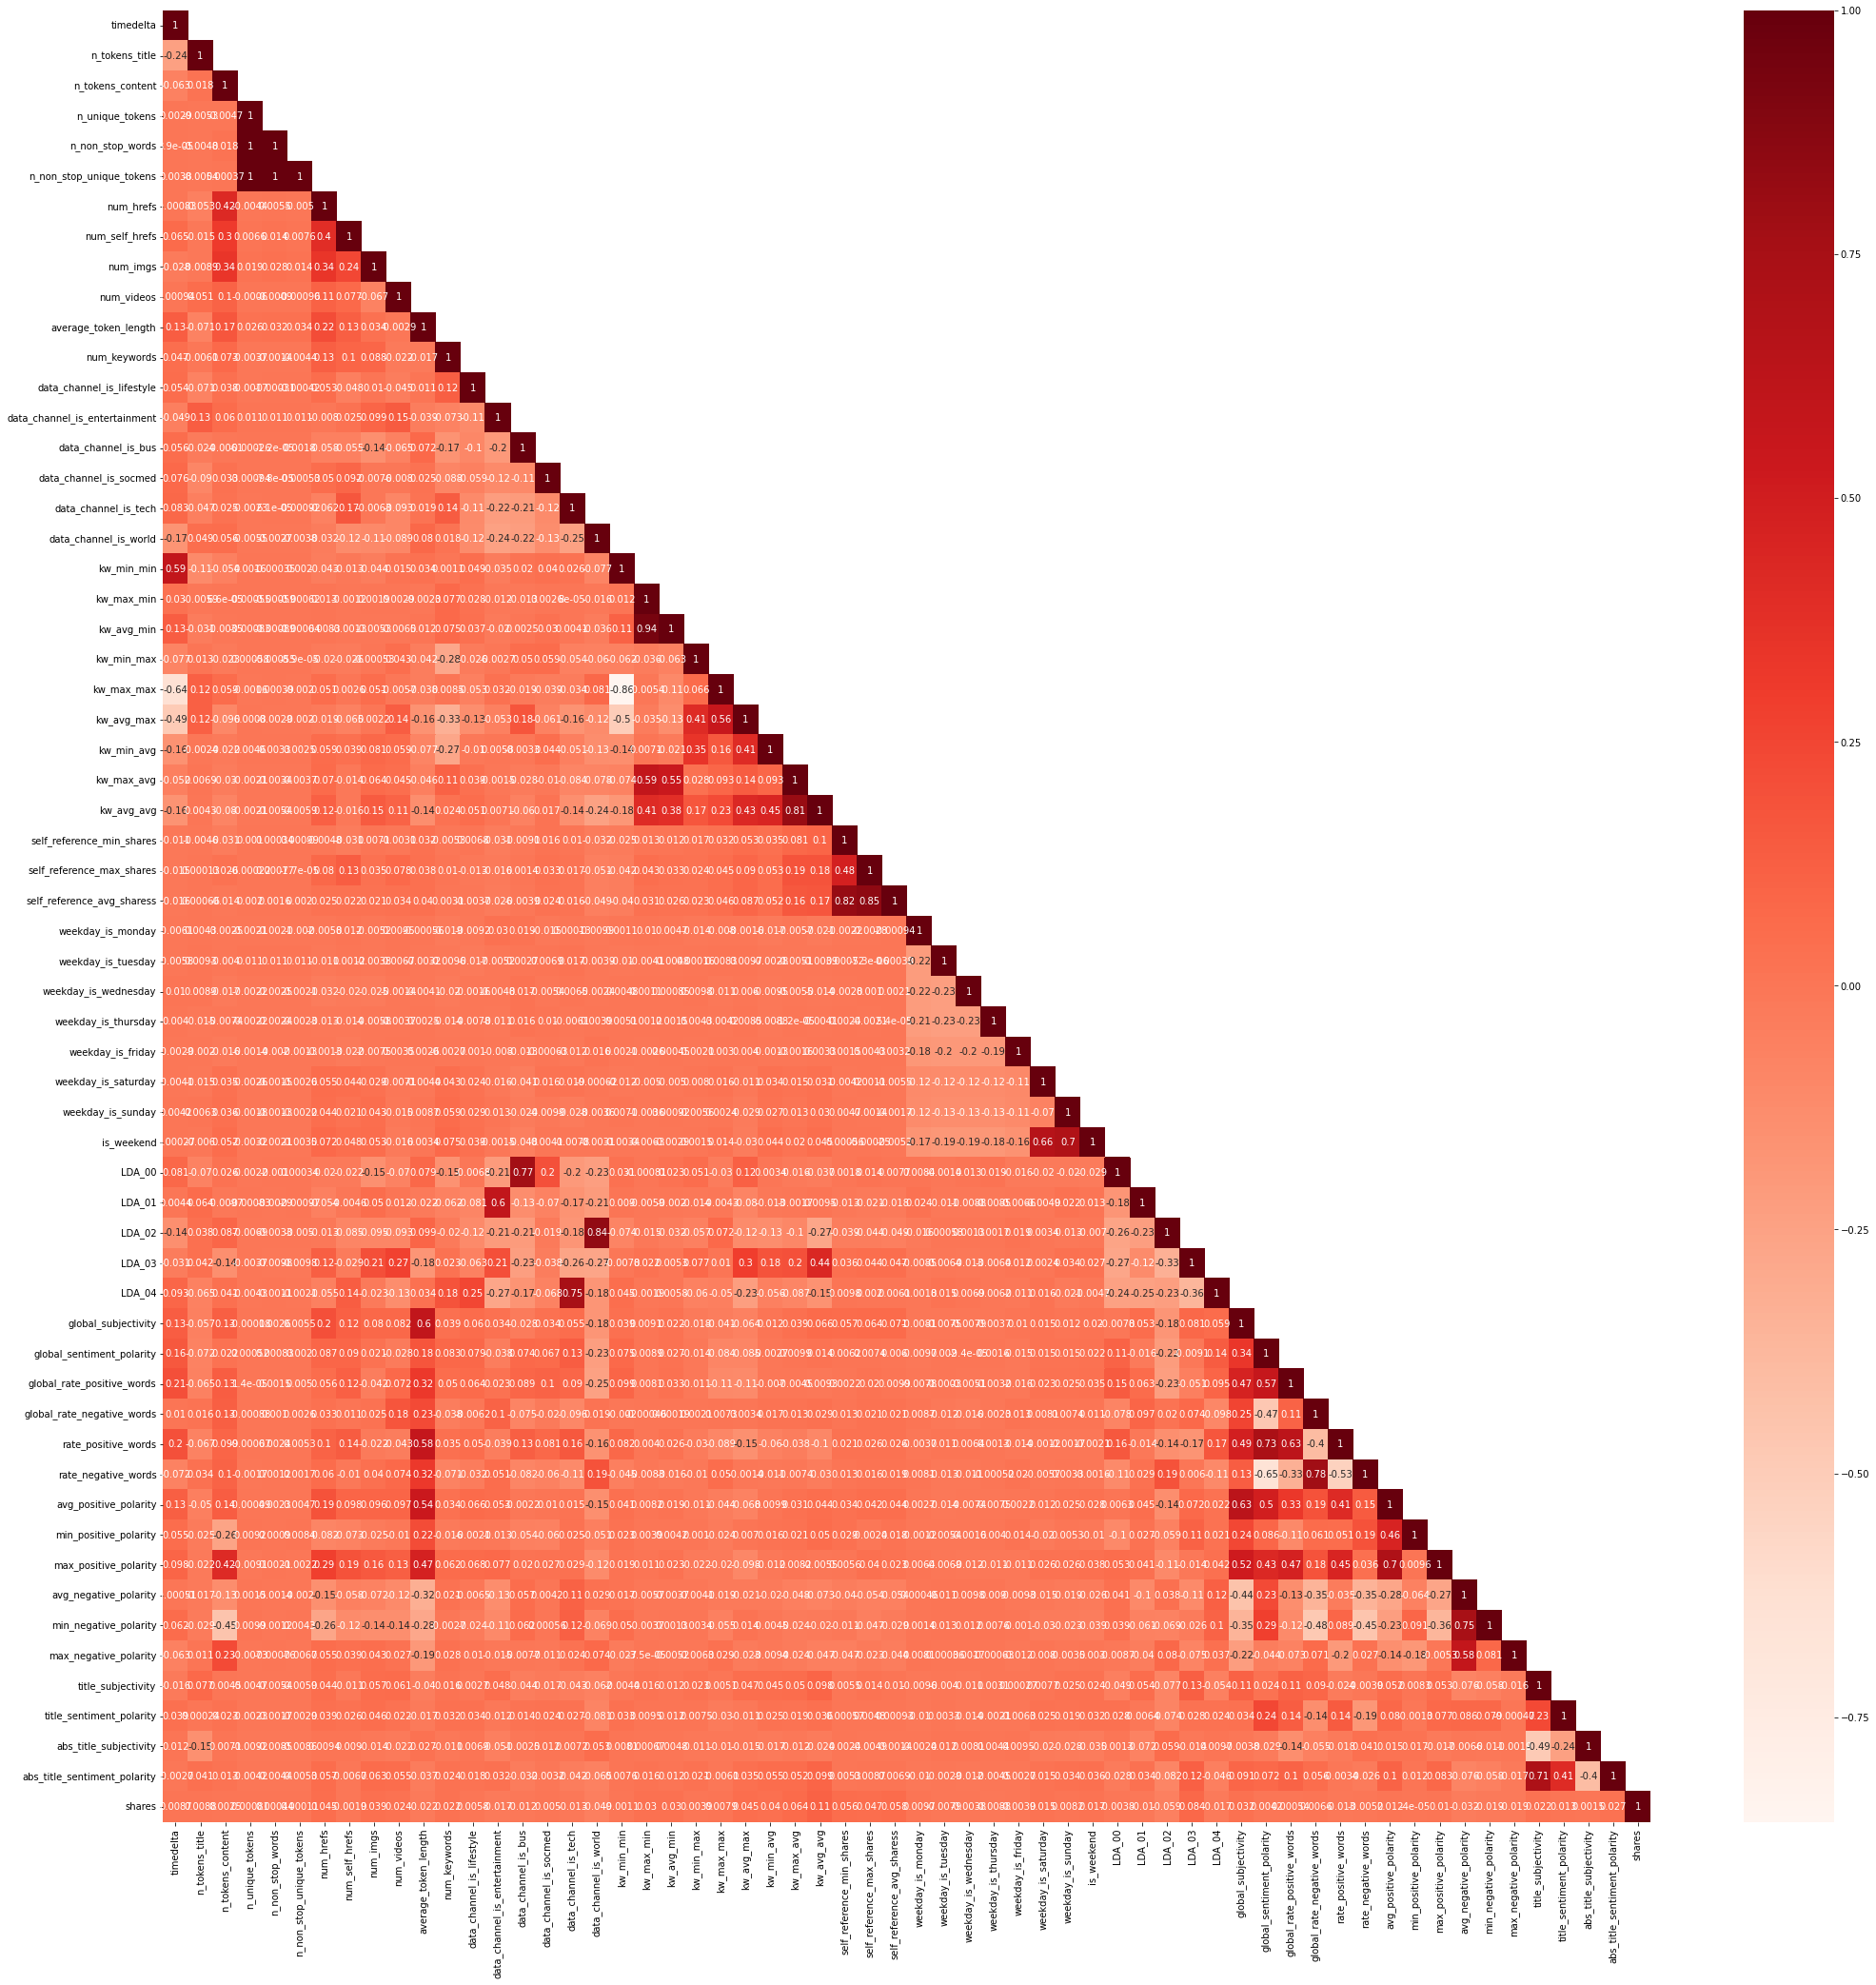

In [465]:
cor=onp.corr()
plt.figure(figsize=(35,35))
onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(onp1,cmap='Reds', annot=True)

In [466]:
# Dropping:
# 'URL' as it is a non-numeric attribute and is not valuable to our analysis 
# 'timedelta' as it is not a feature, but a non-predictive attribute
# 'n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min' as they are highly correlated attributes
onp = onp.drop('timedelta',axis=1)
onp = onp.drop('url',axis=1)
onp= onp.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [467]:
onp.drop(['self_reference_avg_sharess', 'LDA_02', 'kw_avg_avg'], axis = 1, inplace=True)

In [468]:
X_rank = np.linalg.matrix_rank(onp)
X_rank

52

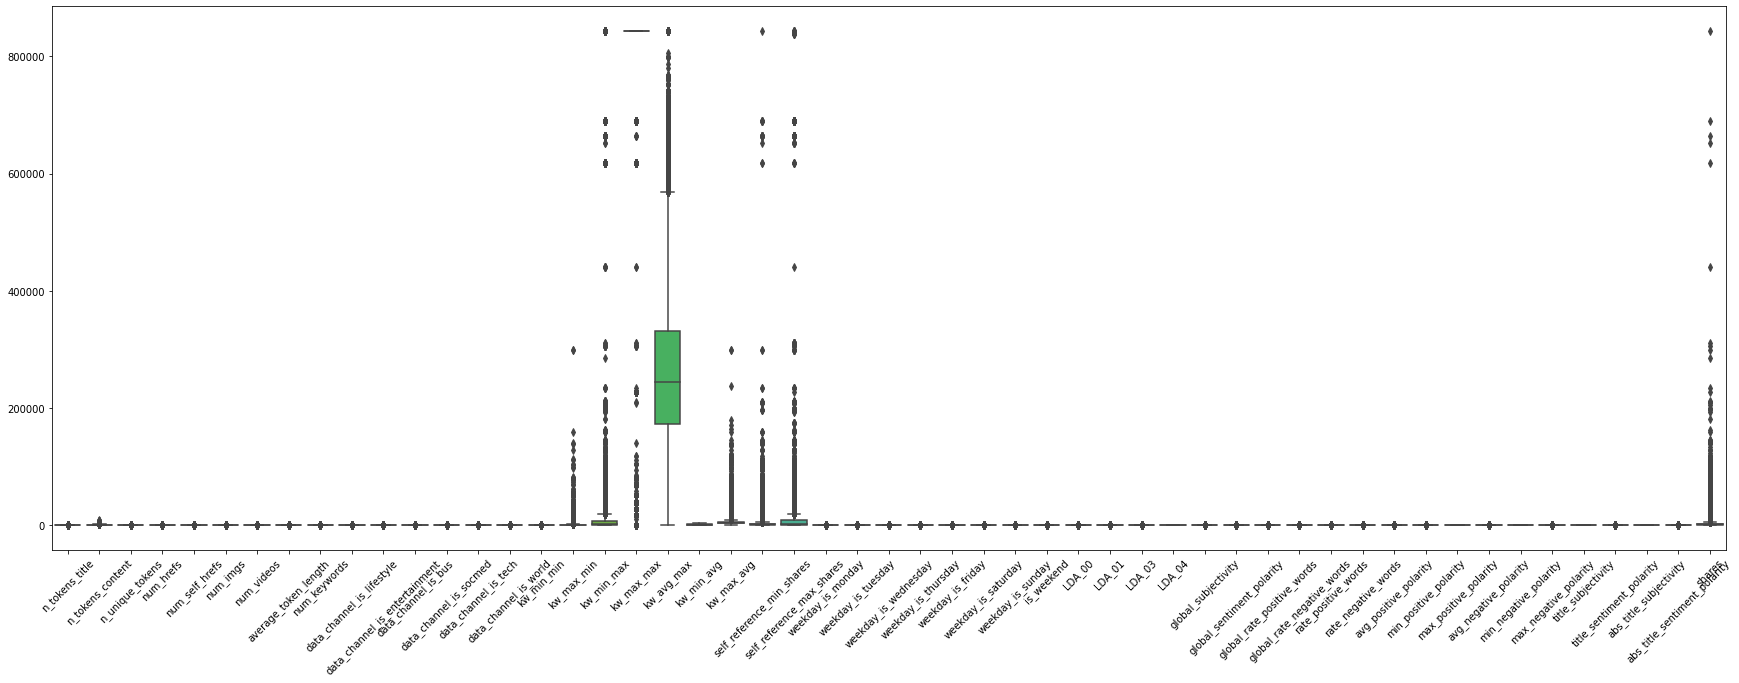

In [469]:
numerical = onp.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
#sns.boxplot(x='popularity',y=' num_imgs', hue='data_channel', data=temp_data, showfliers=False)
sns.boxplot(data = onp)

In [470]:
# numerical_onp  dataframe contains numerical feaures.

numerical_onp = onp.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# categorical_onp  dataframe contains numerical feaures.

categorical_onp = onp[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]


In [471]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

numerical_onp = numerical_onp.drop('shares',axis=1)

In [472]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [473]:
# Finding negative values.

negative_cols=numerical_onp.columns[(numerical_onp<=0).any()]
negative_cols

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [474]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negative_cols:
    m=numerical_onp[i].min()
    name=i +'_new'
    numerical_onp[name]=((numerical_onp[i]+1)-m)

In [475]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_

In [476]:
# Droping old negative column

for i in negative_cols:
    numerical_onp.drop(i,axis=1,inplace=True)

In [477]:
# Checking negative columns

negative_cols=numerical_onp.columns[(numerical_onp<=0).any()]
negative_cols

Index([], dtype='object')

In [478]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical_onp[:] = ss.fit_transform(numerical_onp)

#Baseline Dataset

In [479]:
baseline_onp=pd.concat([numerical_onp,categorical_onp],axis=1)
baseline_onp

,n_tokens_title,num_keywords,n_tokens_content_new,n_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,average_token_length_new,kw_min_min_new,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0.757447,-1.164821,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.661657,-1.688626,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-0.374924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.661657,-0.641015,-0.712192,0.007645,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.374924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.661657,-0.117210,-0.032933,-0.012619,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.230482,-0.117210,1.115439,-0.037655,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.374924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,0.406595,-0.425630,-0.005443,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39640,0.757447,-0.117210,-0.463838,0.042060,-0.166229,0.961420,-0.185832,11.380809,-0.169058,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39641,-0.188622,0.406595,-0.221852,-0.009050,1.157470,-0.594963,0.897288,-0.060829,0.626110,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39642,-2.080761,-1.164821,0.287592,-0.002477,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [480]:
# Ensuring full rank 
for i in range(0,56):
    test = baseline_onp.drop(baseline_onp.iloc[:, i:i+1], axis = 1)
    print(i, ' rank :', np.linalg.matrix_rank(test), ' shape ', test.shape[1])

X = baseline_onp.values[:, 0:-1]
baseline_onp = baseline_onp.drop(baseline_onp.iloc[:, 43:43+1], axis = 1)

0  rank : 50  shape  51
1  rank : 50  shape  51
2  rank : 50  shape  51
3  rank : 50  shape  51
4  rank : 50  shape  51
5  rank : 50  shape  51
6  rank : 50  shape  51
7  rank : 50  shape  51
8  rank : 50  shape  51
9  rank : 50  shape  51
10  rank : 50  shape  51
11  rank : 50  shape  51
12  rank : 50  shape  51
13  rank : 50  shape  51
14  rank : 50  shape  51
15  rank : 50  shape  51
16  rank : 50  shape  51
17  rank : 50  shape  51
18  rank : 50  shape  51
19  rank : 50  shape  51
20  rank : 50  shape  51
21  rank : 50  shape  51
22  rank : 50  shape  51
23  rank : 50  shape  51
24  rank : 50  shape  51
25  rank : 50  shape  51
26  rank : 50  shape  51
27  rank : 50  shape  51
28  rank : 50  shape  51
29  rank : 50  shape  51
30  rank : 50  shape  51
31  rank : 50  shape  51
32  rank : 50  shape  51
33  rank : 50  shape  51
34  rank : 50  shape  51
35  rank : 50  shape  51
36  rank : 50  shape  51
37  rank : 50  shape  51
38  rank : 50  shape  51
39  rank : 50  shape  51
40  rank :

In [481]:
# Adding shares column for regression
extracted_col = onp["shares"]
baseline_onp = pd.concat([baseline_onp,extracted_col],axis=1)

In [482]:
baseline_onp

,n_tokens_title,num_keywords,n_tokens_content_new,n_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,average_token_length_new,kw_min_min_new,...,weekday_is_friday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.757447,-1.164821,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-0.374924,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.661657,-1.688626,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,-0.661657,-0.641015,-0.712192,0.007645,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-0.661657,-0.117210,-0.032933,-0.012619,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.374924,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,1.230482,-0.117210,1.115439,-0.037655,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.374924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,0.406595,-0.425630,-0.005443,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1800
39640,0.757447,-0.117210,-0.463838,0.042060,-0.166229,0.961420,-0.185832,11.380809,-0.169058,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1900
39641,-0.188622,0.406595,-0.221852,-0.009050,1.157470,-0.594963,0.897288,-0.060829,0.626110,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
39642,-2.080761,-1.164821,0.287592,-0.002477,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,-0.389285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1100


#Dataset 2 - After Outiler treatment 


In [483]:
def remove_outliers(array, k=1):
    ul = array.mean() + k*array.std()
    ll = array.mean() - k*array.std()
    array[array<ll] = ll
    array[array>ul] = ul
    return array

In [484]:
numerical_onp = numerical_onp.apply(remove_outliers)

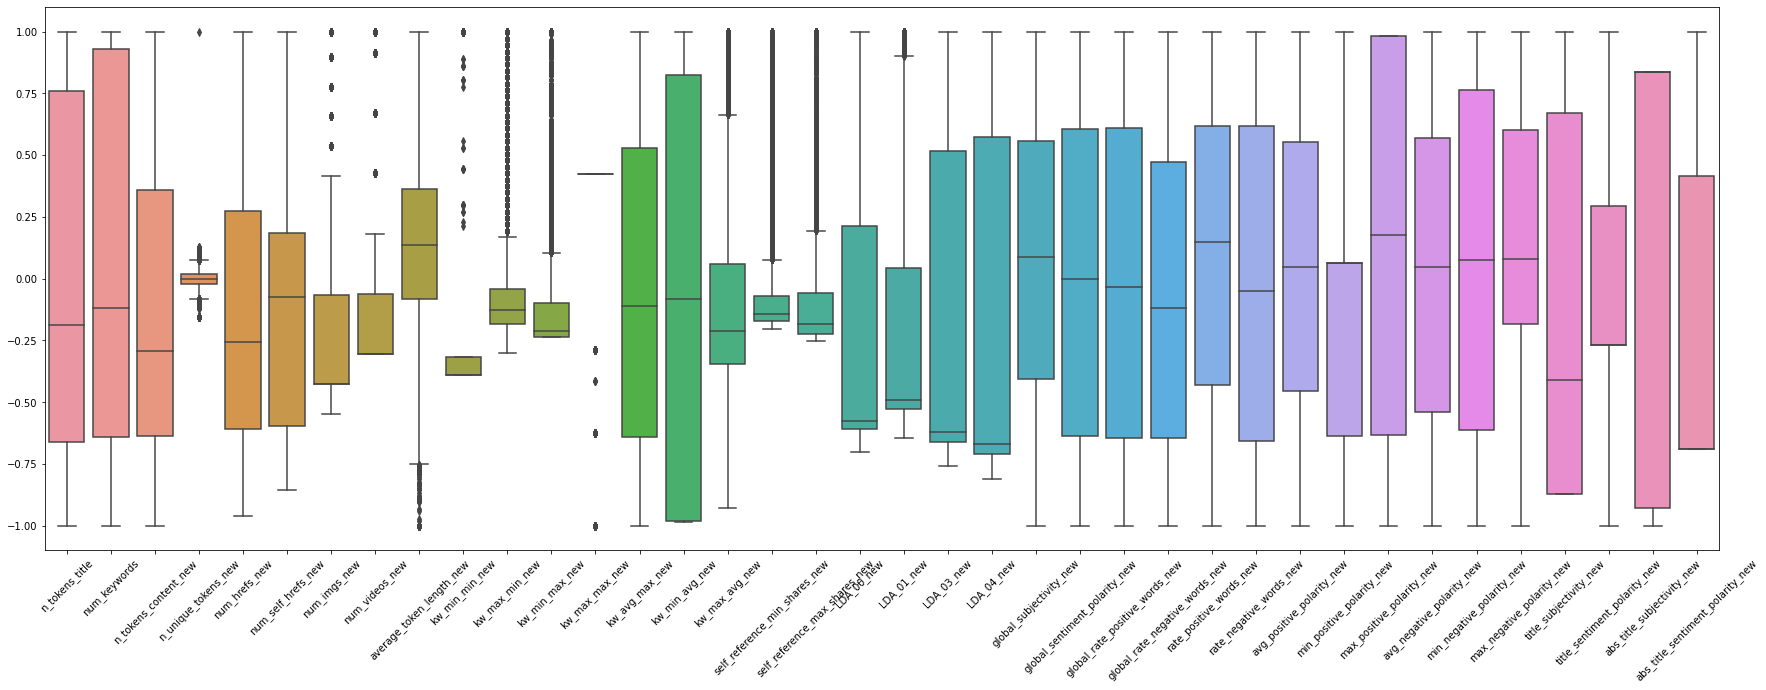

In [485]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = numerical_onp)

In [486]:
numerical_onp.columns

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'avg_positive_polarity_new', 'min_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_

In [487]:
categorical_onp.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [488]:
final_onp=pd.concat([numerical_onp,categorical_onp],axis=1)

In [489]:
final_onp.columns

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'avg_positive_polarity_new', 'min_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_

In [490]:
# Ensuring full rank 
for i in range(0,56):
    test = final_onp.drop(final_onp.iloc[:, i:i+1], axis = 1)
    print(i, ' rank :', np.linalg.matrix_rank(test), ' shape ', test.shape[1])

X = final_onp.values[:, 0:-1]
final_onp = final_onp.drop(final_onp.iloc[:, 43:43+1], axis = 1)

0  rank : 50  shape  51
1  rank : 50  shape  51
2  rank : 50  shape  51
3  rank : 50  shape  51
4  rank : 50  shape  51
5  rank : 50  shape  51
6  rank : 50  shape  51
7  rank : 50  shape  51
8  rank : 50  shape  51
9  rank : 50  shape  51
10  rank : 50  shape  51
11  rank : 50  shape  51
12  rank : 50  shape  51
13  rank : 50  shape  51
14  rank : 50  shape  51
15  rank : 50  shape  51
16  rank : 50  shape  51
17  rank : 50  shape  51
18  rank : 50  shape  51
19  rank : 50  shape  51
20  rank : 50  shape  51
21  rank : 50  shape  51
22  rank : 50  shape  51
23  rank : 50  shape  51
24  rank : 50  shape  51
25  rank : 50  shape  51
26  rank : 50  shape  51
27  rank : 50  shape  51
28  rank : 50  shape  51
29  rank : 50  shape  51
30  rank : 50  shape  51
31  rank : 50  shape  51
32  rank : 50  shape  51
33  rank : 50  shape  51
34  rank : 50  shape  51
35  rank : 50  shape  51
36  rank : 50  shape  51
37  rank : 50  shape  51
38  rank : 50  shape  51
39  rank : 50  shape  51
40  rank :

In [491]:
# Adding shares column for regression
extracted_col = onp["shares"]
final_onp = pd.concat([final_onp,extracted_col],axis=1)

In [492]:
final_onp.head(5)

,n_tokens_title,num_keywords,n_tokens_content_new,n_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,average_token_length_new,kw_min_min_new,...,weekday_is_friday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.757447,-1.000013,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-0.374924,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.661657,-1.000013,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,-0.661657,-0.641015,-0.712192,0.007645,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.374924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-0.661657,-0.117210,-0.032933,-0.012619,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.374924,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,1.000013,-0.117210,1.000013,-0.037655,0.716237,1.000013,1.000013,-0.304268,0.159400,-0.374924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505


#Lasso feature selection

In [493]:
#Lasso feature selection
from pandas.core.groupby.grouper import DataFrame
class LassoFeature:

    def __init__(self, X, y, learningRate, maxIteration, tolerance,
                 regularizationParam, sampleSize, gd = False, 
                 L1lassoRegularized= False):
        
        self.X= X
        self.y = y
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.learningRate = learningRate
        self.regularizationParam = regularizationParam
        self.sampleSize = sampleSize
        
        
    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size = 0.3,
                                                            random_state=0)
        
        return X_train, X_test, y_train, y_test
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    
    def normalize(self, X):
        mean = np.mean(X, 0)
        std = np.std(X, 0)
        
        X_norm = (X-mean) / std
        X_norm = self.add_X0(X_norm)
        return X_norm, mean, std
    
    
    def normalizeTestData(self, X, train_mean, train_std):
        X_norm = (X - train_mean) / train_std
        X_norm = self.add_X0(X_norm)
        return X_norm      
        
    def gradientDescent(self, X, y):        
        print('Solving using L1 Lasso regularization')
        if not 0 < self.regularizationParam < 1:
          raise Exception("Sorry, regularizationParam not defined or not in range 0 and 1")

        self.errors = []
        
        last_error =  float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.costDerivativesForLassoRegularization(X, y)
            
            current_error = self.sse(X, y)
            
            diff = last_error - current_error
            last_error = current_error
            
            self.errors.append(current_error)
            
            if diff < self.tolerance:
                print("The model stopped learning")
                break
                       
    
    def predict(self, X):
        self.y_hat =  X.dot(self.w)
        return self.y_hat
    
    
    def sse(self, X, y):
        y_hat = self.predict(X)
        return ((y_hat - y) ** 2).sum()
    
    def rmse(self, X, y):
        y_hat = self.predict(X)
        return np.sqrt((((y_hat - y) ** 2).sum())/X.shape[0])

    def costFunction(self, X, y):
        return self.sse(X,y) / 2
    
    def costDerivativesForLassoRegularization(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regularizationParam

    
    def fit(self):
        
        X_train, X_test, y_train, y_test = self.splitData()
        X_train ,mean ,std = self.normalize(X_train)
        X_test = self.normalizeTestData(X_test, mean, std)
              
        
        print("Solving using Lasso Regularization")
        self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(X_train, y_train)
            
        print("weights : ", self.w)

        ind=[]
        intercept = self.w[0]
        slopes = self.w[1:]
        abs_val= abs(slopes)

        for i in range (0, len(slopes)):
          ind.append(i)

        val = dict(zip(abs_val, ind))
        a = sorted(val.items())
       
        lasso_index_10=[]
        lasso_index_15 = []
        for x in list(reversed(list(a)))[0:10]:
          lasso_index_10.append(x[1])

        for x in list(reversed(list(a)))[0:15]:
          lasso_index_15.append(x[1])
       
        final_df_lasso_10 = final_onp.iloc[:,lasso_index_10 ]
        final_df_lasso_15 = final_onp.iloc[:,lasso_index_15 ]     
    
        shares_col = final_onp["shares"]
        final_df_lasso_10 = pd.concat([final_df_lasso_10,shares_col],axis=1)
        final_df_lasso_15 = pd.concat([final_df_lasso_15,shares_col],axis=1)
    
        return final_df_lasso_10, final_df_lasso_15


regression_lasso_gd = LassoFeature(X = final_onp.values[:, 0:-1], y = final_onp.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             regularizationParam = 0.001, 
                             maxIteration = 1000, 
                             sampleSize = 100)
final_df_lasso_10, final_df_lasso_15 = regression_lasso_gd.fit()

Solving using Lasso Regularization
Solving using L1 Lasso regularization


100%|██████████| 1000/1000 [00:02<00:00, 444.42it/s]


weights :  [3451.34922519  191.27176616  -57.82081851 -530.91119716 -417.60320358
  471.26733234 -346.28157633  263.92535819  288.68650409 -149.48022414
   55.54887327  203.38218856  -43.8246202  -159.60815975   83.0428314
   65.01449704  678.49712866  279.85274712  668.85840811  247.07746316
  -17.65220483  177.90117977  160.39764059  214.43354785 -171.44071889
 -140.50635246  103.6602739   545.51994184  339.74670286  -87.55149057
 -248.25415908  117.10552546 -165.13798395   62.11484715  -95.1070583
  -85.00116407  -32.05820145   98.75795851  182.80113388  139.14769293
 -135.33124486  -11.84187552  -80.93411417  -49.85190454  -61.90033577
  157.83556727 -351.17155956 -544.53301863 -408.38733553 -279.74610279
 -320.57991644 -551.99422123]


In [494]:
final_df_lasso_10

,kw_max_avg_new,self_reference_max_shares_new,data_channel_is_world,rate_positive_words_new,data_channel_is_entertainment,n_tokens_content_new,num_hrefs_new,n_unique_tokens_new,data_channel_is_bus,data_channel_is_lifestyle,shares
0,-0.927595,-0.239676,0.0,0.457827,1.0,-0.695210,-0.607463,0.032772,0.0,0.0,593
1,-0.927595,-0.251766,0.0,0.269096,0.0,-0.618794,-0.695709,0.016056,1.0,0.0,711
2,-0.927595,-0.229390,0.0,0.920026,0.0,-0.712192,-0.695709,0.007645,1.0,0.0,1500
3,-0.927595,-0.251766,0.0,-0.081405,1.0,-0.032933,-0.166229,-0.012619,0.0,0.0,1200
4,-0.927595,0.138221,0.0,0.936179,0.0,1.000013,0.716237,-0.037655,0.0,0.0,505
...,...,...,...,...,...,...,...,...,...,...,...
39639,-0.271016,0.918194,0.0,0.210679,0.0,-0.425630,-0.166229,-0.005443,0.0,0.0,1800
39640,-0.030669,-0.200580,0.0,0.685316,0.0,-0.463838,-0.166229,0.042060,0.0,0.0,1900
39641,0.200609,-0.217642,0.0,-0.553233,0.0,-0.221852,1.000013,-0.009050,0.0,0.0,1900
39642,-0.372679,-0.240749,1.0,-1.000013,0.0,0.287592,-0.077983,-0.002477,0.0,0.0,1100


In [495]:
# from google.colab import files
# files.download('final_df_lasso_gd_10.csv')
# files.download('final_df_lasso_gd_15.csv')

#PCA

#Linear Regression

In [496]:
from pandas.core.groupby.grouper import DataFrame
class LinearRegression:

    def __init__(self, X, y, learningRate, maxIteration, tolerance,
                 regularizationParam, sampleSize, 
                 L2ridgeRegularized = False):
        
        self.X= X
        self.y = y
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.learningRate = learningRate
        self.L2ridgeRegularized = L2ridgeRegularized
        self.regularizationParam = regularizationParam
        self.sampleSize = sampleSize
        
        
        
    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size = 0.3,
                                                            random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                            test_size = 0.3,
                                                            random_state=0)
        
        return X_train, X_test, y_train, y_test, X_val, y_val
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    
    def normalize(self, X):
        mean = np.mean(X, 0)
        std = np.std(X, 0)
        
        X_norm = (X-mean) / std
        X_norm = self.add_X0(X_norm)
        return X_norm, mean, std
    
    
    def normalizeTestData(self, X, train_mean, train_std):
        X_norm = (X - train_mean) / train_std
        X_norm = self.add_X0(X_norm)
        return X_norm      
        
    def gradientDescent(self, X, y):
        
        if self.L2ridgeRegularized:
          print('Solving using L2 Ridge regularization')
          if not 0 < self.regularizationParam < 1:
            raise Exception("Sorry, regularizationParam not defined or not in range 0 and 1")


        self.errors = []
        
        last_error =  float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            if not self.L2ridgeRegularized:
                self.w = self.w - self.learningRate * self.costDerivatives(X, y)
            else:
                self.w = self.w - self.learningRate * self.costDerivativesForRegularization(X, y)
            
            current_error = self.sse(X, y)
            
            diff = last_error - current_error
            last_error = current_error
            
            self.errors.append(current_error)
            
            if diff < self.tolerance:
                print("The model stopped learning")
                break
                       
    
    def predict(self, X):
        self.y_hat =  X.dot(self.w) 
        return self.y_hat
    
    
    def sse(self, X, y):
        y_hat = self.predict(X)
        return ((y_hat - y) ** 2).sum()
    
    def rmse(self, X, y):
        y_hat = self.predict(X)
        return np.sqrt((((y_hat - y) ** 2).sum())/X.shape[0])

    def costFunction(self, X, y):
        return self.sse(X,y) / 2
    
    def costDerivatives(self, X, y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X)

    def costDerivativesForRegularization(self, X, y):
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y) + self.regularizationParam*(self.w)

    
    def fit(self):
        
        X_train, X_test, y_train, y_test, X_val, y_val = self.splitData()

        X_train ,mean ,std = self.normalize(X_train)
        X_test = self.normalizeTestData(X_test, mean, std)
        X_val = self.normalizeTestData(X_val, mean, std)
                
        
        print("Solving using Gradient Descent")
        self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(X_train, y_train)
        #plt.plot(self.errors)
            
        print("weights : ", self.w)
         

        print("\n")

        print('SSE for the train dataset : ', self.sse(X_train, y_train))
        print('RMSE for the train dataset : ', self.rmse(X_train, y_train))
        print("\n")



        print('SSE for the test dataset : ', self.sse(X_test, y_test))
        print('RMSE for the test dataset : ', self.rmse(X_test, y_test))
        print("\n")

        print('SSE for the validation dataset : ', self.sse(X_val, y_val))
        print('RMSE for the validation dataset : ', self.rmse(X_val, y_val))
        print("\n")

    

In [497]:
def linearRegAll(df, learningRate, tolerance):
    # without regularization gradient descent form
    regression = LinearRegression(X = df.values[:, 0:-1], y = df.values[:, -1],
                             learningRate=learningRate, tolerance=tolerance,
                              maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
    
    print("---without regularization---")
    # err= 
    regression.fit()
    # plt.plot(err)
    # plt.title("Linear Regression without regularization")
    # plt.show()
    print("\n\n")

   
    # with Ridge regularization gd form
    regression_reg_gd = LinearRegression(X = df.values[:, 0:-1], y = df.values[:, -1],
                             learningRate=learningRate, tolerance=tolerance,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = True,
                             sampleSize = 150)
    #regression_reg_gd.fit()
    print("----with Ridge regularization-----")
    # err1 = 
    regression_reg_gd.fit()
    # plt.plot(err1)
    # plt.title("Linear Regression with Ridge regularization")
    # plt.show()
    print("\n\n")

In [498]:
# baseline dataset
linearRegAll(baseline_onp, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


100%|██████████| 1000/1000 [00:01<00:00, 564.41it/s]


weights :  [3487.02996139  124.11248085  307.44140134  271.6731081   169.85282937
  365.10171748 -199.23966559  102.67628026  -21.44745177 -168.02109886
   54.21734952   57.14865327 -183.01779136 -185.85625433  329.17994757
  320.23412094  253.92644825  774.88116688  105.47888301  425.22183897
  263.88660512  564.66125494  344.4631539   275.63738736  134.41840312
 -249.38753813   31.9613182  -183.18158084 -138.51191005 -167.00773509
  -83.08629639  111.8181635  -385.15437499  177.16403167  -10.13839162
  -66.3934529   -28.74705475   84.7356975   154.2736929   119.1614935
  -90.22694717    9.67110945 -145.32080036  -84.48268335 -154.15785612
  210.81237623 -455.77477672 -847.84769542 -673.42539562 -359.39901038
 -597.51576398 -731.15444769]


SSE for the train dataset :  3798507830772.8994
RMSE for the train dataset :  13983.82560945207


SSE for the test dataset :  1525494154167.439
RMSE for the test dataset :  11325.080736498041


SSE for the validation dataset :  667253693119.1285
RM

100%|██████████| 1000/1000 [00:01<00:00, 591.95it/s]


weights :  [3487.02978188  124.11245796  307.4414145   271.67295562  169.85271496
  365.10173057 -199.23964861  102.6763149   -21.447432   -168.02119774
   54.21738262   57.14864986 -183.01778568 -185.85623875  329.17998528
  320.23411872  253.9264611   774.88113168  105.47889087  425.22155809
  263.88658635  564.66133822  344.46287631  275.63739171  134.41824302
 -249.38740643   31.96124458 -183.18142535 -138.51178237 -167.00759529
  -83.08629683  111.81811842 -385.15416424  177.16388901  -10.13848948
  -66.39342074  -28.74705228   84.7356953   154.27367012  119.16148917
  -90.22693754    9.67111146 -145.32079265  -84.48267464 -154.15781965
  210.81235017 -455.77448258 -847.84741429 -673.42487134 -359.39874409
 -597.51524363 -731.15409706]


SSE for the train dataset :  3798507830773.153
RMSE for the train dataset :  13983.825609452537


SSE for the test dataset :  1525493163596.639
RMSE for the test dataset :  11325.077059559628


SSE for the validation dataset :  667253691127.4325
R

In [499]:
# after outlier dataset
linearRegAll(final_onp, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


100%|██████████| 1000/1000 [00:01<00:00, 721.83it/s]


weights :  [ 3.48702996e+03  1.45538518e+02 -8.34264440e+00 -5.38844263e+02
 -4.65194203e+02  4.80387586e+02 -3.50022794e+02  2.46255885e+02
  2.89629745e+02 -1.04277464e+02 -7.63421581e+01  3.04101814e+02
 -9.20979100e+01 -3.22468790e+02  1.23125543e+02  1.75659157e+02
  6.40403257e+02  2.13995988e+02  7.44825872e+02  3.19188459e+02
  3.18312647e+01  2.56041200e+02  2.91216272e+02  2.11714917e+02
 -3.07519140e+02 -1.29836998e+02  1.04310134e+02  8.68023801e+02
  5.75814289e+02 -2.24216731e+00 -2.68787199e+02  8.00619880e+01
 -9.72456347e+01  9.34418575e+01 -1.30601146e+02 -1.63383493e+02
 -3.95039211e+01  7.15513746e+01  2.63836780e+02  1.25571554e+02
 -8.98674792e+01  3.39604842e+00 -1.43997965e+02 -7.36432795e+01
 -1.21441104e+02  1.97990000e+02 -4.38896623e+02 -6.21283265e+02
 -5.12760594e+02 -4.11705228e+02 -4.58558990e+02 -6.07049689e+02]


SSE for the train dataset :  3784504767765.0386
RMSE for the train dataset :  13958.026374493082


SSE for the test dataset :  793447506378.8

100%|██████████| 1000/1000 [00:01<00:00, 634.08it/s]

weights :  [ 3.48702978e+03  1.45538517e+02 -8.34263487e+00 -5.38843659e+02
 -4.65193401e+02  4.80387550e+02 -3.50022716e+02  2.46255946e+02
  2.89629691e+02 -1.04277393e+02 -7.63420985e+01  3.04101806e+02
 -9.20979063e+01 -3.22468742e+02  1.23125565e+02  1.75659150e+02
  6.40403255e+02  2.13996062e+02  7.44825797e+02  3.19188316e+02
  3.18312970e+01  2.56041329e+02  2.91216137e+02  2.11714938e+02
 -3.07518882e+02 -1.29836964e+02  1.04310101e+02  8.68021902e+02
  5.75812649e+02 -2.24226812e+00 -2.68787102e+02  8.00619930e+01
 -9.72456781e+01  9.34418398e+01 -1.30601212e+02 -1.63383425e+02
 -3.95038959e+01  7.15513908e+01  2.63836698e+02  1.25571548e+02
 -8.98674667e+01  3.39605413e+00 -1.43997954e+02 -7.36432725e+01
 -1.21441080e+02  1.97989967e+02 -4.38896357e+02 -6.21283001e+02
 -5.12760117e+02 -4.11704943e+02 -4.58558500e+02 -6.07049299e+02]


SSE for the train dataset :  3784504767802.498
RMSE for the train dataset :  13958.02637456216


SSE for the test dataset :  793447499243.397

In [500]:
# after outlier dataset
linearRegAll(final_onp, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


100%|██████████| 1000/1000 [00:01<00:00, 616.45it/s]


weights :  [ 3.48702996e+03  1.45538518e+02 -8.34264440e+00 -5.38844263e+02
 -4.65194203e+02  4.80387586e+02 -3.50022794e+02  2.46255885e+02
  2.89629745e+02 -1.04277464e+02 -7.63421581e+01  3.04101814e+02
 -9.20979100e+01 -3.22468790e+02  1.23125543e+02  1.75659157e+02
  6.40403257e+02  2.13995988e+02  7.44825872e+02  3.19188459e+02
  3.18312647e+01  2.56041200e+02  2.91216272e+02  2.11714917e+02
 -3.07519140e+02 -1.29836998e+02  1.04310134e+02  8.68023801e+02
  5.75814289e+02 -2.24216731e+00 -2.68787199e+02  8.00619880e+01
 -9.72456347e+01  9.34418575e+01 -1.30601146e+02 -1.63383493e+02
 -3.95039211e+01  7.15513746e+01  2.63836780e+02  1.25571554e+02
 -8.98674792e+01  3.39604842e+00 -1.43997965e+02 -7.36432795e+01
 -1.21441104e+02  1.97990000e+02 -4.38896623e+02 -6.21283265e+02
 -5.12760594e+02 -4.11705228e+02 -4.58558990e+02 -6.07049689e+02]


SSE for the train dataset :  3784504767765.0386
RMSE for the train dataset :  13958.026374493082


SSE for the test dataset :  793447506378.8

100%|██████████| 1000/1000 [00:01<00:00, 619.86it/s]

weights :  [ 3.48702978e+03  1.45538517e+02 -8.34263487e+00 -5.38843659e+02
 -4.65193401e+02  4.80387550e+02 -3.50022716e+02  2.46255946e+02
  2.89629691e+02 -1.04277393e+02 -7.63420985e+01  3.04101806e+02
 -9.20979063e+01 -3.22468742e+02  1.23125565e+02  1.75659150e+02
  6.40403255e+02  2.13996062e+02  7.44825797e+02  3.19188316e+02
  3.18312970e+01  2.56041329e+02  2.91216137e+02  2.11714938e+02
 -3.07518882e+02 -1.29836964e+02  1.04310101e+02  8.68021902e+02
  5.75812649e+02 -2.24226812e+00 -2.68787102e+02  8.00619930e+01
 -9.72456781e+01  9.34418398e+01 -1.30601212e+02 -1.63383425e+02
 -3.95038959e+01  7.15513908e+01  2.63836698e+02  1.25571548e+02
 -8.98674667e+01  3.39605413e+00 -1.43997954e+02 -7.36432725e+01
 -1.21441080e+02  1.97989967e+02 -4.38896357e+02 -6.21283001e+02
 -5.12760117e+02 -4.11704943e+02 -4.58558500e+02 -6.07049299e+02]


SSE for the train dataset :  3784504767802.498
RMSE for the train dataset :  13958.02637456216


SSE for the test dataset :  793447499243.397

In [501]:
# Lasso feature selection  dataset 10 features
#df_lasso_gd_10 = pd.read_csv('final_df_lasso_gd_10.csv')
#df_lasso_gd_10.head()
linearRegAll(df_lasso_gd_10, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


 18%|█▊        | 183/1000 [00:00<00:00, 1140.62it/s]


The model stopped learning
weights :  [3487.02996139 1024.0204828   823.3260723  -523.47584155  -74.0877008
 -377.00675039 -388.34537884  528.51011492 -232.03459612 -151.46167589
 -227.02973527]


SSE for the train dataset :  3802370758394.494
RMSE for the train dataset :  13990.934292905209


SSE for the test dataset :  798132661221.5427
RMSE for the test dataset :  8191.6912406825695


SSE for the validation dataset :  661974199319.3651
RMSE for the validation dataset :  8917.198009389635





----with Ridge regularization-----
Solving using Gradient Descent
Solving using L2 Ridge regularization


 19%|█▊        | 186/1000 [00:00<00:00, 918.30it/s]

The model stopped learning
weights :  [3487.02978188 1024.020433    823.32605257 -523.47576955  -74.08767777
 -377.00668041 -388.34543267  528.51014168 -232.03462588 -151.46162827
 -227.02969461]


SSE for the train dataset :  3802370758394.494
RMSE for the train dataset :  13990.934292905209


SSE for the test dataset :  798132659720.2781
RMSE for the test dataset :  8191.691232978401


SSE for the validation dataset :  661974198716.6222
RMSE for the validation dataset :  8917.198005329978







In [502]:
# Lasso feature selection  dataset 15 features
#df_lasso_gd_15 = pd.read_csv('final_df_lasso_gd_15.csv')
#df_lasso_gd_15.head()
linearRegAll(df_lasso_gd_15, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


100%|██████████| 1000/1000 [00:00<00:00, 1530.03it/s]


weights :  [3487.02996139  883.52785118  736.45020827 -687.82241292  580.80920759
 -511.21365925 -536.9641007   588.13494839 -555.67464318 -273.83833856
 -318.2217276  -331.54161879  608.32567945 -247.99732011  309.86884215
  236.94712325]


SSE for the train dataset :  3796717386534.4834
RMSE for the train dataset :  13980.52955055715


SSE for the test dataset :  793707335747.62
RMSE for the test dataset :  8168.949852783676


SSE for the validation dataset :  659043160924.7235
RMSE for the validation dataset :  8897.434667061143





----with Ridge regularization-----
Solving using Gradient Descent
Solving using L2 Ridge regularization


100%|██████████| 1000/1000 [00:00<00:00, 1829.19it/s]

weights :  [3487.02978188  883.52783459  736.45014925 -687.82230195  580.80785867
 -511.21357084 -536.96357731  588.13493167 -555.67391118 -273.83824371
 -318.22165793 -331.54154629  608.32433829 -247.99720916  309.86878579
  236.94718584]


SSE for the train dataset :  3796717386548.659
RMSE for the train dataset :  13980.529550583251


SSE for the test dataset :  793707329981.7646
RMSE for the test dataset :  8168.94982311217


SSE for the validation dataset :  659043159456.2661
RMSE for the validation dataset :  8897.434657148664







In [503]:
# PCA feature selection  dataset 95% var
df_95_var_pca = pd.read_csv('final_df_95_var_pca.csv')
df_95_var_pca.drop('Unnamed: 0',axis=1,inplace=True)
#df_95_var_pca.head()
linearRegAll(df_95_var_pca, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


 98%|█████████▊| 983/1000 [00:01<00:00, 672.11it/s]


The model stopped learning
weights :  [ 3.48702996e+03  2.39514799e+02  7.46761547e+02  1.06935015e+02
  7.13389742e+02  4.63072403e+02 -4.46589110e+02 -1.60921833e+02
  4.14678886e+02  1.51160971e+02 -5.93792069e+01 -8.04522604e+01
  1.54841671e+02  1.15583298e+02 -3.19876040e+02  4.72974911e+01
 -3.72984001e+00  8.15219271e+01 -3.71650988e+02  2.44833252e+02
 -4.93527943e+02  6.89757870e+02  2.78360064e+02  1.77310522e+02
 -5.01965650e+01 -3.58956753e-01 -6.28783998e+01  1.48321832e+02
 -5.94962567e+01  3.07483952e+01 -1.15215514e+02 -5.54729248e+01
  1.04332037e+02 -2.36577019e+01  5.64313877e+01 -4.21929132e+02
 -5.57809335e+02 -3.53116014e+02 -3.58420819e+02 -3.39173827e+02
 -4.95024881e+02]


SSE for the train dataset :  3789052537602.584
RMSE for the train dataset :  13966.41040841922


SSE for the test dataset :  787986937947.6255
RMSE for the test dataset :  8139.459042524202


SSE for the validation dataset :  658325937739.6703
RMSE for the validation dataset :  8892.59190109

100%|██████████| 1000/1000 [00:01<00:00, 669.54it/s]

weights :  [ 3.48702978e+03  2.39514755e+02  7.46761351e+02  1.06934931e+02
  7.13389556e+02  4.63072212e+02 -4.46589080e+02 -1.60921735e+02
  4.14678862e+02  1.51160882e+02 -5.93791739e+01 -8.04523609e+01
  1.54841637e+02  1.15583324e+02 -3.19876063e+02  4.72974971e+01
 -3.72983100e+00  8.15219324e+01 -3.71650973e+02  2.44833247e+02
 -4.93527913e+02  6.89757858e+02  2.78360051e+02  1.77310496e+02
 -5.01965604e+01 -3.58951433e-01 -6.28783867e+01  1.48321827e+02
 -5.94962559e+01  3.07483908e+01 -1.15215510e+02 -5.54729233e+01
  1.04332035e+02 -2.36576971e+01  5.64313900e+01 -4.21929278e+02
 -5.57809452e+02 -3.53116321e+02 -3.58420979e+02 -3.39174179e+02
 -4.95025282e+02]


SSE for the train dataset :  3789052537602.5723
RMSE for the train dataset :  13966.410408419199


SSE for the test dataset :  787986936417.3231
RMSE for the test dataset :  8139.459034620623


SSE for the validation dataset :  658325937533.257
RMSE for the validation dataset :  8892.591899704243







In [504]:
# PCA feature selection  dataset 10 num
df_10_num_pca = pd.read_csv('final_df_10_num_pca.csv')
df_10_num_pca.drop('Unnamed: 0',axis=1,inplace=True)
#df_10_num_pca.head()
linearRegAll(df_10_num_pca, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


 80%|███████▉  | 799/1000 [00:00<00:00, 845.49it/s]


The model stopped learning
weights :  [3487.02996139  212.65273524  839.61266727  142.6738994   758.00420887
  546.69291101 -440.65898248 -231.78621449  380.01785205  149.88998716
  -73.05282054  148.67647009  -60.13741683   45.73326316 -125.2519825
  -55.19469943  110.83990639  -37.41886339   50.67007557 -274.56541942
 -723.91689936 -220.26570312 -191.61395314 -229.04655623 -401.89122573]


SSE for the train dataset :  3810565304687.4707
RMSE for the train dataset :  14006.002215243614


SSE for the test dataset :  797056317147.1422
RMSE for the test dataset :  8186.165810268476


SSE for the validation dataset :  666853163046.0273
RMSE for the validation dataset :  8949.998997070941





----with Ridge regularization-----
Solving using Gradient Descent
Solving using L2 Ridge regularization


 80%|████████  | 803/1000 [00:00<00:00, 903.33it/s]

The model stopped learning
weights :  [3487.02978188  212.65271131  839.61259519  142.6738824   758.00414505
  546.69286146 -440.65897138 -231.78618347  380.01782893  149.889958
  -73.05279868  148.67646165  -60.13741456   45.73325969 -125.2519773
  -55.19469637  110.83990363  -37.41885863   50.6700772  -274.56541541
 -723.91685978 -220.26571375 -191.61395399 -229.04659294 -401.89127941]


SSE for the train dataset :  3810565304687.4707
RMSE for the train dataset :  14006.002215243614


SSE for the test dataset :  797056315484.6655
RMSE for the test dataset :  8186.165801731243


SSE for the validation dataset :  666853162386.3002
RMSE for the validation dataset :  8949.998992643761







In [505]:
# PCA feature selection  dataset 15 num
df_15_num_pca = pd.read_csv('final_df_15_num_pca.csv')
df_15_num_pca.drop('Unnamed: 0',axis=1,inplace=True)
#df_10_num_pca.head()
linearRegAll(df_15_num_pca, learningRate=0.00001, tolerance=0.00005)

---without regularization---
Solving using Gradient Descent


 93%|█████████▎| 927/1000 [00:01<00:00, 725.90it/s]


The model stopped learning
weights :  [3487.02996139  273.57339883  815.10565967  145.89739355  788.38926842
  507.57895668 -387.5315515  -217.55515092  418.86238002  203.42042299
 -138.92642905  -48.63327108  227.47214318  124.54293852 -264.54857002
   59.12815367  147.25195618  -61.21770779   42.25167451 -119.38061685
  -55.31079458  112.08401746  -38.20828019   50.95973652 -306.25492724
 -655.6846451  -380.57909299 -248.34942784 -251.56600086 -304.89074081]


SSE for the train dataset :  3808464700383.0674
RMSE for the train dataset :  14002.141223244364


SSE for the test dataset :  796779205601.9286
RMSE for the test dataset :  8184.742649688408


SSE for the validation dataset :  666176674929.4005
RMSE for the validation dataset :  8945.458189145025





----with Ridge regularization-----
Solving using Gradient Descent
Solving using L2 Ridge regularization


 90%|█████████ | 903/1000 [00:01<00:00, 773.31it/s]

The model stopped learning
weights :  [3487.02978188  273.57339063  815.1059802   145.8975895   788.38956927
  507.57934227 -387.53160553 -217.55536577  418.86232654  203.42055524
 -138.92639516  -48.63301803  227.47211552  124.54283867 -264.54851212
   59.12809958  147.25194189  -61.21770227   42.25167489 -119.38061581
  -55.3107871   112.08401234  -38.20827523   50.95973661 -306.25441528
 -655.68411181 -380.57815827 -248.34890149 -251.56501998 -304.8897896 ]


SSE for the train dataset :  3808464700383.0986
RMSE for the train dataset :  14002.14122324442


SSE for the test dataset :  796779202444.6475
RMSE for the test dataset :  8184.742633472164


SSE for the validation dataset :  666176672693.3411
RMSE for the validation dataset :  8945.458174132058







Solving using Gradient Descent


100%|██████████| 1000/1000 [00:01<00:00, 559.23it/s]


weights :  [ 3.48702996e+03  1.45538518e+02 -8.34264440e+00 -5.38844263e+02
 -4.65194203e+02  4.80387586e+02 -3.50022794e+02  2.46255885e+02
  2.89629745e+02 -1.04277464e+02 -7.63421581e+01  3.04101814e+02
 -9.20979100e+01 -3.22468790e+02  1.23125543e+02  1.75659157e+02
  6.40403257e+02  2.13995988e+02  7.44825872e+02  3.19188459e+02
  3.18312647e+01  2.56041200e+02  2.91216272e+02  2.11714917e+02
 -3.07519140e+02 -1.29836998e+02  1.04310134e+02  8.68023801e+02
  5.75814289e+02 -2.24216731e+00 -2.68787199e+02  8.00619880e+01
 -9.72456347e+01  9.34418575e+01 -1.30601146e+02 -1.63383493e+02
 -3.95039211e+01  7.15513746e+01  2.63836780e+02  1.25571554e+02
 -8.98674792e+01  3.39604842e+00 -1.43997965e+02 -7.36432795e+01
 -1.21441104e+02  1.97990000e+02 -4.38896623e+02 -6.21283265e+02
 -5.12760594e+02 -4.11705228e+02 -4.58558990e+02 -6.07049689e+02]
SSE for the test dataset :  793447506378.827
RMSE for the test dataset :  8167.612642753111


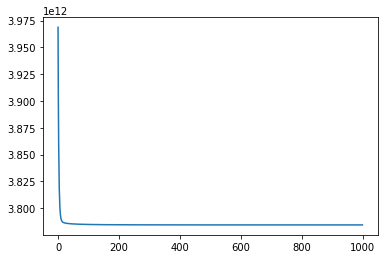

In [203]:
# without regularization gradient descent form
regression = LinearRegression(X = final_onp.values[:, 0:-1], y = final_onp.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                              maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression.fit()

Solving using Gradient Descent
Solving using L2 Ridge regularization


100%|██████████| 1000/1000 [00:01<00:00, 523.95it/s]


weights :  [ 3.48702978e+03  1.45538517e+02 -8.34263487e+00 -5.38843659e+02
 -4.65193401e+02  4.80387550e+02 -3.50022716e+02  2.46255946e+02
  2.89629691e+02 -1.04277393e+02 -7.63420985e+01  3.04101806e+02
 -9.20979063e+01 -3.22468742e+02  1.23125565e+02  1.75659150e+02
  6.40403255e+02  2.13996062e+02  7.44825797e+02  3.19188316e+02
  3.18312970e+01  2.56041329e+02  2.91216137e+02  2.11714938e+02
 -3.07518882e+02 -1.29836964e+02  1.04310101e+02  8.68021902e+02
  5.75812649e+02 -2.24226812e+00 -2.68787102e+02  8.00619930e+01
 -9.72456781e+01  9.34418398e+01 -1.30601212e+02 -1.63383425e+02
 -3.95038959e+01  7.15513908e+01  2.63836698e+02  1.25571548e+02
 -8.98674667e+01  3.39605413e+00 -1.43997954e+02 -7.36432725e+01
 -1.21441080e+02  1.97989967e+02 -4.38896357e+02 -6.21283001e+02
 -5.12760117e+02 -4.11704943e+02 -4.58558500e+02 -6.07049299e+02]
SSE for the test dataset :  793447499243.3975
RMSE for the test dataset :  8167.612606027666


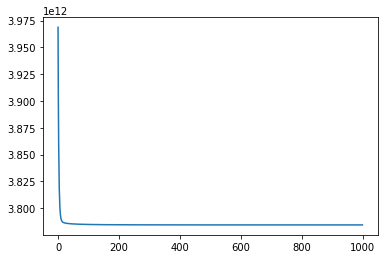

In [204]:
# with Ridge regularization gd form
regression_reg_gd = LinearRegression(X = final_onp.values[:, 0:-1], y = final_onp.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             regularizationParam = 0.001,
                             maxIteration = 1000, L2ridgeRegularized = True,
                             sampleSize = 100)
regression_reg_gd.fit()

In [205]:
# Lasso feature selection  dataset 10 features
df_lasso_gd_10 = pd.read_csv('final_df_lasso_gd_10.csv')
df_lasso_gd_10.head()

,kw_max_avg_new,self_reference_max_shares_new,data_channel_is_world,rate_positive_words_new,data_channel_is_entertainment,n_tokens_content_new,num_hrefs_new,n_unique_tokens_new,data_channel_is_bus,data_channel_is_lifestyle,shares
0,-0.927595,-0.239676,0.0,0.457827,1.0,-0.695210,-0.607463,0.032772,0.0,0.0,593
1,-0.927595,-0.251766,0.0,0.269096,0.0,-0.618794,-0.695709,0.016056,1.0,0.0,711
2,-0.927595,-0.229390,0.0,0.920026,0.0,-0.712192,-0.695709,0.007645,1.0,0.0,1500
3,-0.927595,-0.251766,0.0,-0.081405,1.0,-0.032933,-0.166229,-0.012619,0.0,0.0,1200
4,-0.927595,0.138221,0.0,0.936179,0.0,1.000013,0.716237,-0.037655,0.0,0.0,505


Solving using Gradient Descent


 18%|█▊        | 183/1000 [00:00<00:00, 1372.55it/s]

The model stopped learning
weights :  [3487.02996139 1024.0204828   823.3260723  -523.47584155  -74.0877008
 -377.00675039 -388.34537884  528.51011492 -232.03459612 -151.46167589
 -227.02973527]
SSE for the test dataset :  798132661221.5427
RMSE for the test dataset : 

 8191.6912406825695


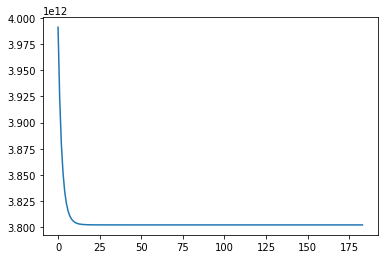

In [206]:
#Lasso feature selection w/o regularization
regression_l = LinearRegression(X = df_lasso_gd_10.values[:, 0:-1], y = df_lasso_gd_10.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_l.fit()

Solving using Gradient Descent


 18%|█▊        | 183/1000 [00:00<00:00, 1065.16it/s]

The model stopped learning
weights :  

[3487.02996139 1024.0204828   823.3260723  -523.47584155  -74.0877008
 -377.00675039 -388.34537884  528.51011492 -232.03459612 -151.46167589
 -227.02973527]
SSE for the test dataset :  798132661221.5427
RMSE for the test dataset :  8191.6912406825695


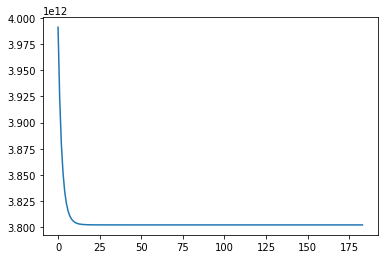

In [207]:
#Lasso feature selection dataset w regularization
regression_l_reg = LinearRegression(X = df_lasso_gd_10.values[:, 0:-1], y = df_lasso_gd_10.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_l_reg.fit()

In [208]:
# Lasso feature selection  dataset 15 features
df_lasso_gd_15 = pd.read_csv('final_df_lasso_gd_15.csv')
df_lasso_gd_15.head()

,kw_max_avg_new,self_reference_max_shares_new,data_channel_is_world,rate_positive_words_new,data_channel_is_entertainment,n_tokens_content_new,num_hrefs_new,n_unique_tokens_new,data_channel_is_bus,data_channel_is_lifestyle,num_self_hrefs_new,rate_negative_words_new,data_channel_is_tech,num_videos_new,self_reference_min_shares_new,shares
0,-0.927595,-0.239676,0.0,0.457827,1.0,-0.695210,-0.607463,0.032772,0.0,0.0,-0.335566,-0.366077,0.0,-0.304268,-0.177459,593
1,-0.927595,-0.251766,0.0,0.269096,0.0,-0.618794,-0.695709,0.016056,1.0,0.0,-0.594963,-0.136192,0.0,-0.304268,-0.202587,711
2,-0.927595,-0.229390,0.0,0.920026,0.0,-0.712192,-0.695709,0.007645,1.0,0.0,-0.594963,-0.929060,0.0,-0.304268,-0.156079,1500
3,-0.927595,-0.251766,0.0,-0.081405,1.0,-0.032933,-0.166229,-0.012619,0.0,0.0,-0.854360,0.290738,0.0,-0.304268,-0.202587,1200
4,-0.927595,0.138221,0.0,0.936179,0.0,1.000013,0.716237,-0.037655,0.0,0.0,1.000013,-0.948734,1.0,-0.304268,-0.174976,505


Solving using Gradient Descent


100%|██████████| 1000/1000 [00:00<00:00, 1616.17it/s]


weights :  [3487.02996139  883.52785118  736.45020827 -687.82241292  580.80920759
 -511.21365925 -536.9641007   588.13494839 -555.67464318 -273.83833856
 -318.2217276  -331.54161879  608.32567945 -247.99732011  309.86884215
  236.94712325]
SSE for the test dataset :  793707335747.62
RMSE for the test dataset :  8168.949852783676


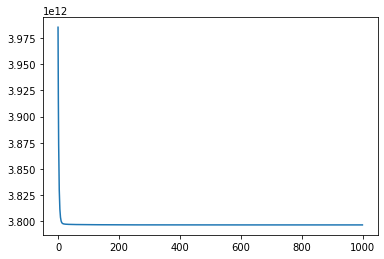

In [209]:
#Lasso feature selection w/o regularization
regression_l15 = LinearRegression(X = df_lasso_gd_15.values[:, 0:-1], y = df_lasso_gd_15.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_l15.fit()

Solving using Gradient Descent
Solving using L2 Ridge regularization


100%|██████████| 1000/1000 [00:00<00:00, 1555.39it/s]


weights :  [3487.02978188  883.52783459  736.45014925 -687.82230195  580.80785867
 -511.21357084 -536.96357731  588.13493167 -555.67391118 -273.83824371
 -318.22165793 -331.54154629  608.32433829 -247.99720916  309.86878579
  236.94718584]
SSE for the test dataset :  793707329981.7646
RMSE for the test dataset :  8168.94982311217


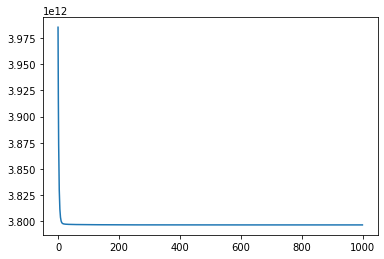

In [210]:
#Lasso feature selection dataset w regularization
regression_l15_reg = LinearRegression(X = df_lasso_gd_15.values[:, 0:-1], y = df_lasso_gd_15.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                            maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = True,
                            sampleSize = 150)
regression_l15_reg.fit()

In [211]:
# PCA feature selection  dataset 95% var
df_95_var_pca = pd.read_csv('final_df_95_var_pca.csv')
df_95_var_pca.drop('Unnamed: 0',axis=1,inplace=True)
df_95_var_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.464653,0.017904,0.447135,-1.471869,0.195701,2.731815,-0.750992,0.517072,-0.461728,-0.601074,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.181002,-2.613517,-0.315886,-0.408428,-0.516102,1.400012,-0.381236,-0.112232,1.677500,-0.214052,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,1.720893,-0.846979,-2.296819,-0.298979,0.458309,2.178074,0.526865,0.505604,-0.445273,-0.162236,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-1.047854,-0.606374,-1.634070,-0.917769,0.688722,1.625194,-0.292015,-0.203641,-0.130200,0.961948,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,2.658304,0.207943,-1.161268,-1.969308,-0.850458,-0.659226,0.210864,-0.226899,-0.432415,-0.682358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505


Solving using Gradient Descent


 98%|█████████▊| 983/1000 [00:01<00:00, 626.21it/s]


The model stopped learning
weights :  [ 3.48702996e+03  2.39514799e+02  7.46761547e+02  1.06935015e+02
  7.13389742e+02  4.63072403e+02 -4.46589110e+02 -1.60921833e+02
  4.14678886e+02  1.51160971e+02 -5.93792069e+01 -8.04522604e+01
  1.54841671e+02  1.15583298e+02 -3.19876040e+02  4.72974911e+01
 -3.72984001e+00  8.15219271e+01 -3.71650988e+02  2.44833252e+02
 -4.93527943e+02  6.89757870e+02  2.78360064e+02  1.77310522e+02
 -5.01965650e+01 -3.58956753e-01 -6.28783998e+01  1.48321832e+02
 -5.94962567e+01  3.07483952e+01 -1.15215514e+02 -5.54729248e+01
  1.04332037e+02 -2.36577019e+01  5.64313877e+01 -4.21929132e+02
 -5.57809335e+02 -3.53116014e+02 -3.58420819e+02 -3.39173827e+02
 -4.95024881e+02]
SSE for the test dataset :  787986937947.6255
RMSE for the test dataset :  8139.459042524202


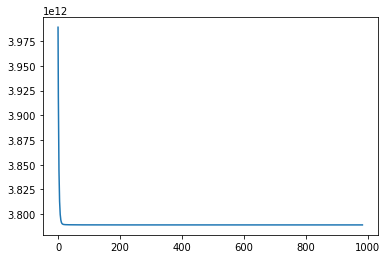

In [212]:
# PCA feature selection  dataset 95% var w/o regularization
regression_pca95 = LinearRegression(X = df_95_var_pca.values[:, 0:-1], y = df_95_var_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_pca95.fit()

Solving using Gradient Descent
Solving using L2 Ridge regularization


100%|██████████| 1000/1000 [00:01<00:00, 614.86it/s]


weights :  [ 3.48702978e+03  2.39514755e+02  7.46761351e+02  1.06934931e+02
  7.13389556e+02  4.63072212e+02 -4.46589080e+02 -1.60921735e+02
  4.14678862e+02  1.51160882e+02 -5.93791739e+01 -8.04523609e+01
  1.54841637e+02  1.15583324e+02 -3.19876063e+02  4.72974971e+01
 -3.72983100e+00  8.15219324e+01 -3.71650973e+02  2.44833247e+02
 -4.93527913e+02  6.89757858e+02  2.78360051e+02  1.77310496e+02
 -5.01965604e+01 -3.58951433e-01 -6.28783867e+01  1.48321827e+02
 -5.94962559e+01  3.07483908e+01 -1.15215510e+02 -5.54729233e+01
  1.04332035e+02 -2.36576971e+01  5.64313900e+01 -4.21929278e+02
 -5.57809452e+02 -3.53116321e+02 -3.58420979e+02 -3.39174179e+02
 -4.95025282e+02]
SSE for the test dataset :  787986936417.3231
RMSE for the test dataset :  8139.459034620623


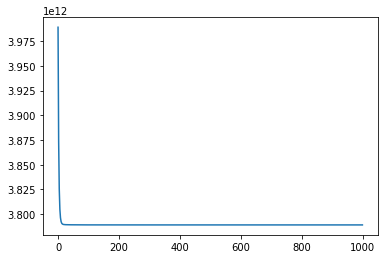

In [213]:
# PCA feature selection  dataset 95% var ridge regularization
regression_pca95_reg = LinearRegression(X = df_95_var_pca.values[:, 0:-1], y = df_95_var_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = True,
                            sampleSize = 150)
regression_pca95_reg.fit()

In [214]:
# PCA feature selection  dataset 10 num
df_10_num_pca = pd.read_csv('final_df_10_num_pca.csv')
df_10_num_pca.drop('Unnamed: 0',axis=1,inplace=True)
df_10_num_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.464646,0.017921,0.447156,-1.471809,0.195606,2.731764,-0.750613,0.514283,-0.462824,-0.600277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.181025,-2.613542,-0.315868,-0.408460,-0.516286,1.399491,-0.381415,-0.111885,1.676404,-0.215498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,1.720874,-0.846957,-2.296810,-0.298882,0.458138,2.177389,0.527992,0.501345,-0.446881,-0.159036,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-1.047855,-0.606391,-1.634075,-0.917819,0.688749,1.625169,-0.292074,-0.201273,-0.129026,0.961379,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,2.658288,0.207935,-1.161248,-1.969296,-0.850587,-0.660407,0.211750,-0.229480,-0.431691,-0.682515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505


Solving using Gradient Descent


 80%|███████▉  | 799/1000 [00:01<00:00, 711.01it/s]


The model stopped learning
weights :  [3487.02996139  212.65273524  839.61266727  142.6738994   758.00420887
  546.69291101 -440.65898248 -231.78621449  380.01785205  149.88998716
  -73.05282054  148.67647009  -60.13741683   45.73326316 -125.2519825
  -55.19469943  110.83990639  -37.41886339   50.67007557 -274.56541942
 -723.91689936 -220.26570312 -191.61395314 -229.04655623 -401.89122573]
SSE for the test dataset :  797056317147.1422
RMSE for the test dataset :  8186.165810268476


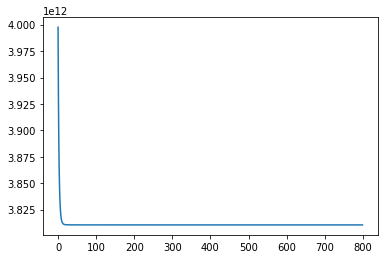

In [215]:
# PCA feature selection  dataset 10 num w/o regularization
regression_pca10 = LinearRegression(X = df_10_num_pca.values[:, 0:-1], y = df_10_num_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_pca10.fit()

Solving using Gradient Descent
Solving using L2 Ridge regularization


 80%|████████  | 803/1000 [00:01<00:00, 754.48it/s]


The model stopped learning
weights :  [3487.02978188  212.65271131  839.61259519  142.6738824   758.00414505
  546.69286146 -440.65897138 -231.78618347  380.01782893  149.889958
  -73.05279868  148.67646165  -60.13741456   45.73325969 -125.2519773
  -55.19469637  110.83990363  -37.41885863   50.6700772  -274.56541541
 -723.91685978 -220.26571375 -191.61395399 -229.04659294 -401.89127941]
SSE for the test dataset :  797056315484.6655
RMSE for the test dataset :  8186.165801731243


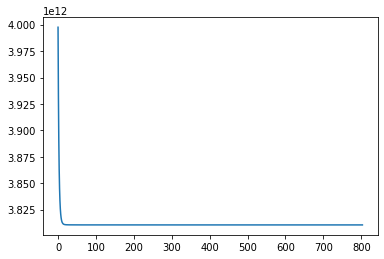

In [216]:
# PCA feature selection  dataset 10 num ridge regularization
regression_pca10_reg = LinearRegression(X = df_10_num_pca.values[:, 0:-1], y = df_10_num_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = True,
                            sampleSize = 150)
regression_pca10_reg.fit()

In [217]:
# PCA feature selection  dataset 15 num
df_15_num_pca = pd.read_csv('final_df_15_num_pca.csv')
df_15_num_pca.drop('Unnamed: 0',axis=1,inplace=True)
df_15_num_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.464651,0.017902,0.447131,-1.471885,0.195599,2.731576,-0.750730,0.517068,-0.461971,-0.600029,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.181005,-2.613517,-0.315884,-0.408447,-0.516199,1.399926,-0.381025,-0.112138,1.677487,-0.213688,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,1.720899,-0.846978,-2.296816,-0.298945,0.458512,2.178402,0.526346,0.505560,-0.445131,-0.163525,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-1.047850,-0.606374,-1.634075,-0.917742,0.688864,1.625247,-0.292338,-0.203919,-0.130266,0.961191,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,2.658299,0.207943,-1.161272,-1.969341,-0.850694,-0.659617,0.211649,-0.227067,-0.432667,-0.680773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505


Solving using Gradient Descent


 93%|█████████▎| 927/1000 [00:01<00:00, 802.80it/s]


The model stopped learning
weights :  [3487.02996139  273.57339883  815.10565967  145.89739355  788.38926842
  507.57895668 -387.5315515  -217.55515092  418.86238002  203.42042299
 -138.92642905  -48.63327108  227.47214318  124.54293852 -264.54857002
   59.12815367  147.25195618  -61.21770779   42.25167451 -119.38061685
  -55.31079458  112.08401746  -38.20828019   50.95973652 -306.25492724
 -655.6846451  -380.57909299 -248.34942784 -251.56600086 -304.89074081]
SSE for the test dataset :  796779205601.9286
RMSE for the test dataset :  8184.742649688408


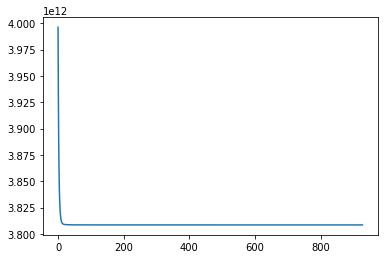

In [218]:
# PCA feature selection  dataset 15 num w/o regularization
regression_pca15 = LinearRegression(X = df_15_num_pca.values[:, 0:-1], y = df_15_num_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = False,
                            sampleSize = 150)
regression_pca15.fit()

Solving using Gradient Descent
Solving using L2 Ridge regularization


 90%|█████████ | 903/1000 [00:01<00:00, 740.22it/s]


The model stopped learning
weights :  [3487.02978188  273.57339063  815.1059802   145.8975895   788.38956927
  507.57934227 -387.53160553 -217.55536577  418.86232654  203.42055524
 -138.92639516  -48.63301803  227.47211552  124.54283867 -264.54851212
   59.12809958  147.25194189  -61.21770227   42.25167489 -119.38061581
  -55.3107871   112.08401234  -38.20827523   50.95973661 -306.25441528
 -655.68411181 -380.57815827 -248.34890149 -251.56501998 -304.8897896 ]
SSE for the test dataset :  796779202444.6475
RMSE for the test dataset :  8184.742633472164


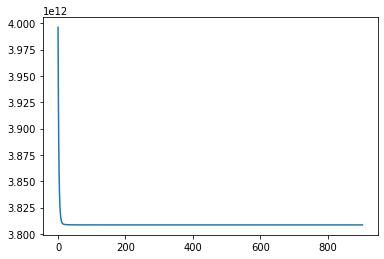

In [219]:
# PCA feature selection  dataset 15 num ridge regularization
regression_pca15_reg = LinearRegression(X = df_15_num_pca.values[:, 0:-1], y = df_15_num_pca.values[:, -1],
                             learningRate=0.00001, tolerance=0.00005,
                             maxIteration = 1000,
                             regularizationParam = 0.001, L2ridgeRegularized = True,
                            sampleSize = 150)
regression_pca15_reg.fit()